In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import quandl as ql
import matplotlib.pyplot as plt

In [2]:
ql.ApiConfig.api_key = "mReXiguoQheAobrp8Dmn"
data = ql.get("EIA/PET_RWTC_D")

In [3]:
data.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


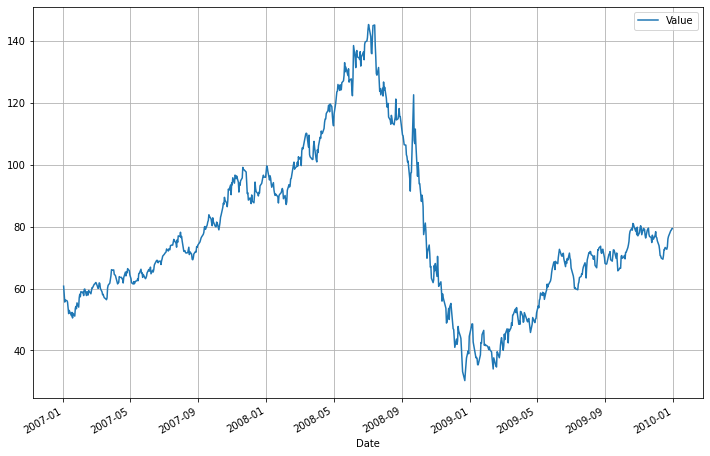

In [4]:
data['2007':'2009'].plot(grid=True, figsize=(12, 8))

In [5]:
import requests
url = 'https://www.quandl.com/api/v3/datasets/WIKI/FB/data.csv?api_key=mReXiguoQheAobrp8Dmn'
res = requests.get(url)

In [6]:
import io
byte_content = res.content
string_content = byte_content.decode('utf-8')
df = pd.read_csv(io.StringIO(string_content), index_col='Date' )

In [7]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0


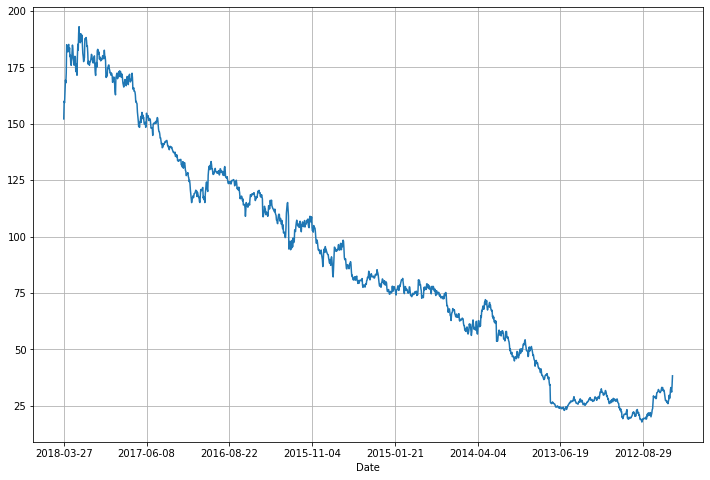

In [8]:
df['Close'].plot(grid=True, figsize=(12, 8))